In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot import *
from dynamic_stop_loss import *
from cost_benchmark import *
import calendar
from price_path_simulation import *
from tqdm import trange

# Set parameters
np.random.seed(42)

year = 2024
days = 366 if calendar.isleap(year) else 365
simulations = 1000  # Number of simulations
initial_price = 50  # Initial price in EUR/MWh
rising_mu = 0.0005  
falling_mu = -0.0005
no_trend_mu = 0
sigma = 0.005  # Volatility (daily standard deviation of returns)

Run the simulation and create DataFrames for each trend

In [2]:
rising_price_paths = monte_carlo_simulation(initial_price, rising_mu, sigma, days, simulations)
falling_price_paths = monte_carlo_simulation(initial_price, falling_mu, sigma, days, simulations)
no_trend_price_paths = monte_carlo_simulation(initial_price, no_trend_mu, sigma, days, simulations)

dates = pd.date_range(start='2024-01-01', periods=days)

df_rising_simulations = pd.DataFrame(rising_price_paths.T, index=dates)
df_falling_simulations = pd.DataFrame(falling_price_paths.T, index=dates)
df_no_trend_simulations = pd.DataFrame(no_trend_price_paths.T, index=dates)

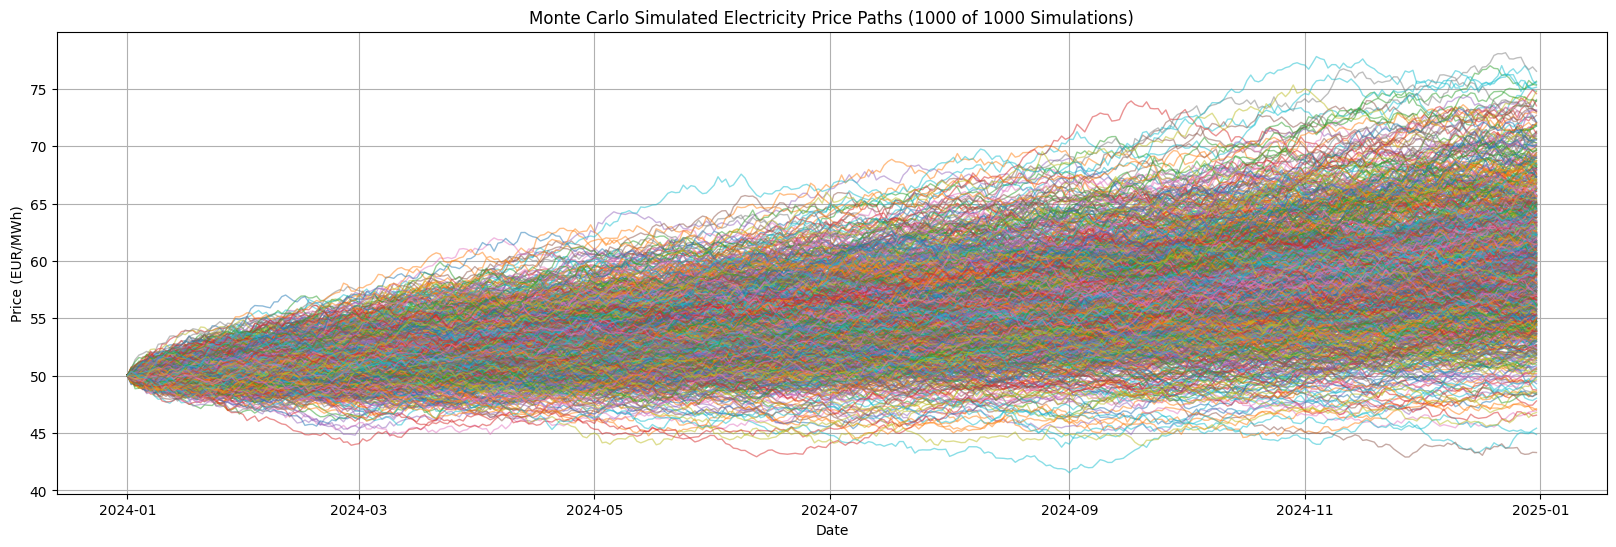

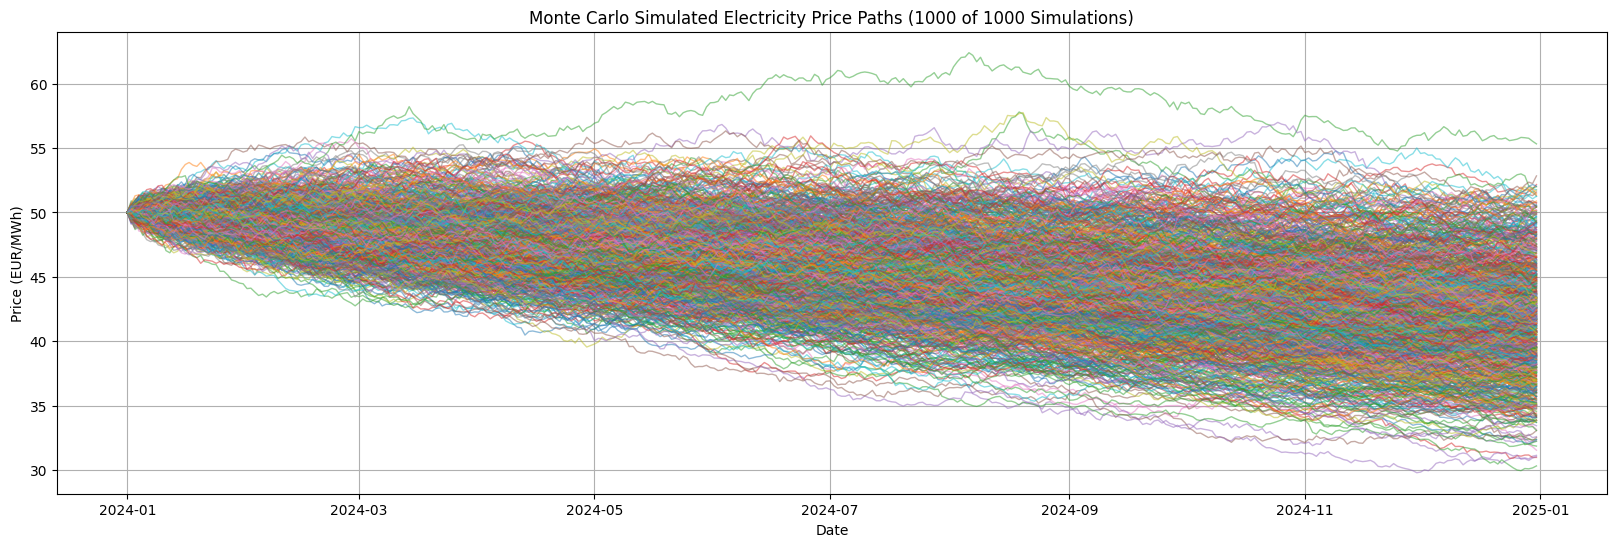

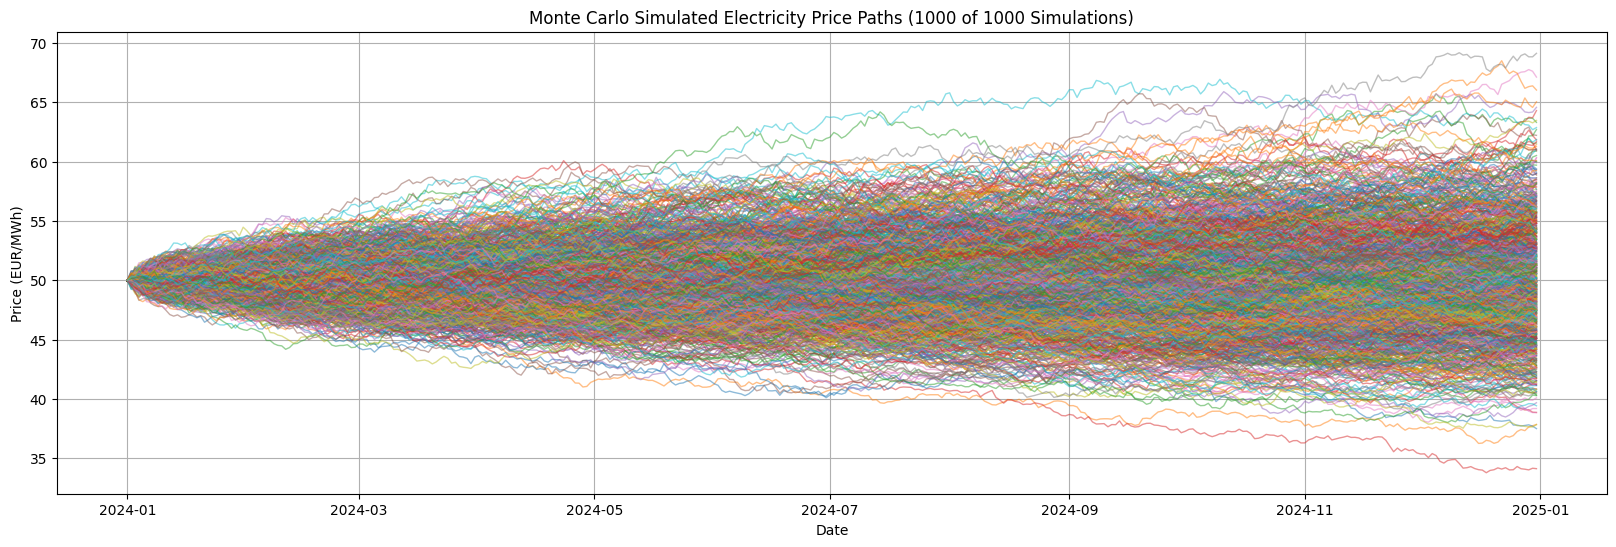

In [3]:
plot_simulations(df_rising_simulations, simulations)
plot_simulations(df_falling_simulations, simulations)
plot_simulations(df_no_trend_simulations, simulations)

In [5]:
spread = 0.8

### Dynamic stop loss works well in rising trend. 

In [6]:
calculate_savings_expectations("Rising Trend", df_rising_simulations, simulations, spread) 

Calculating savings for Rising Trend: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s]

Results for Rising Trend
Average Savings: 492604.32
Number of positive savings: 933


(492604.32, 933)

### Not working in falling trend.

In [7]:
calculate_savings_expectations("Falling Trend", df_falling_simulations, simulations, spread)

Calculating savings for Falling Trend: 100%|██████████| 1000/1000 [07:38<00:00,  2.18it/s]

Results for Falling Trend
Average Savings: -186914.685
Number of positive savings: 249


(-186914.685, 249)

### Need some luck for no trend.

In [8]:
calculate_savings_expectations("No Trend", df_no_trend_simulations, simulations, spread)

Calculating savings for No Trend: 100%|██████████| 1000/1000 [03:57<00:00,  4.21it/s]

Results for No Trend
Average Savings: -2970.375
Number of positive savings: 477


(-2970.375, 477)